<a href="https://colab.research.google.com/github/fofofizzz/AI-4032-course/blob/main/Hw1/Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Q2-PART I

#part A

#1)

خوانده میشود loadmat فرمت فایل دانلود شده به صورت متلب است که با دستور

In [2]:
!pip install --upgrade --no-cashe-dir gdown
!gdown 1-5IcKbUHSWls9e8l92zxPu7KFUPnsAMI


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --no-cashe-dir
Downloading...
From (original): https://drive.google.com/uc?id=1-5IcKbUHSWls9e8l92zxPu7KFUPnsAMI
From (redirected): https://drive.google.com/uc?id=1-5IcKbUHSWls9e8l92zxPu7KFUPnsAMI&confirm=t&uuid=6477010a-57fb-46a9-afc2-0af893c26399
To: /content/110.mat
100% 7.78M/7.78M [00:00<00:00, 20.7MB/s]


In [4]:
#file path: (/content/110.mat)

#2)

In [3]:
import numpy as np
import scipy.io
from scipy.io import loadmat

'''
scipyخب ما در این بخش از کد ابتدا کتاب خانه
را اضافه میکنیمloadmat و از آن
چون ما به دستور loadmat
را ایمپورت کردیمscipy احتیاج داریم از این رو
'''

data = loadmat('/content/110.mat')   # بارگذاری فایل مد نظر ما

print(data.keys())                                       # نمایش اطلاعات کلیدی
print("\nX110RPM =" ,data["X110RPM"])                    # نمایش اطلاعات مربوط به دور
print("\nX110_DE_time:" , "\nlen=" , len(data["X110_DE_time"]) , "\ndata:\n" , data["X110_DE_time"])
#DEنمایش اطلاعات مربوط به متغیر
print("\nX110_FE_time:" , "\nlen=" , len(data["X110_FE_time"]) , "\ndata:\n" , data["X110_FE_time"])
#FEنمایش اطلاعات مربوط به متغیر

dict_keys(['__header__', '__version__', '__globals__', 'X110_DE_time', 'X110_FE_time', 'X110RPM'])

X110RPM = [[1772]]

X110_DE_time: 
len= 486224 
data:
 [[ 0.03212677]
 [ 0.07823077]
 [ 0.16146831]
 ...
 [-0.08845292]
 [-0.02899754]
 [ 0.00855323]]

X110_FE_time: 
len= 486224 
data:
 [[0.08629091]
 [0.11053455]
 [0.11012364]
 ...
 [0.40145818]
 [0.46782   ]
 [0.52534727]]


در این فایل دو آرایه متشکل از تعداد زیادی فلوت موجود است که به نام های مشخص شده ذخیره شده اند و یک متغیر به نام دور بر دقیقه نیز موجود است که آرایه ای یک بعدی است

#3)

In [5]:
signal = data[ 'X110_DE_time' ]

#PART B

#1)

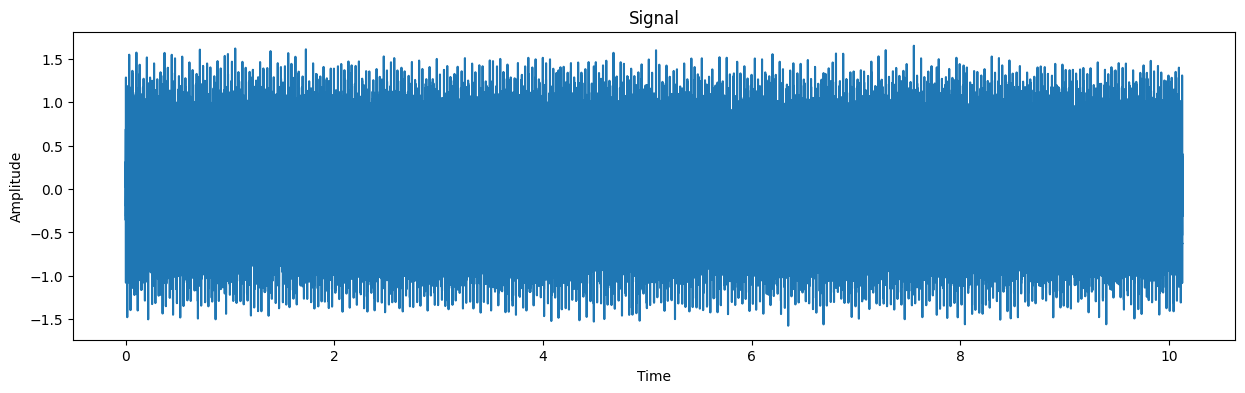

In [6]:
import matplotlib.pyplot as plt         #we use matplotlib.pyplot
fs=48000                                #declaring the frequence
time = np.arange(len(signal)) / fs      #declaring the time that it continue
plt.figure(figsize=(15, 4))             # ایجاد یک شکل با عرض 15  و ارتفاع 4 برای نمایش بهتر
plt.plot(time,signal)                   #making a plot
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal')
plt.show()

In [ ]:
#چون فرکانس را ۴۸ هزار در نظر گرفتیم و ما ۴۸ هزار نمونه داریم
#تمام این نمونه 10 ثانیه خواهد شد

#2)

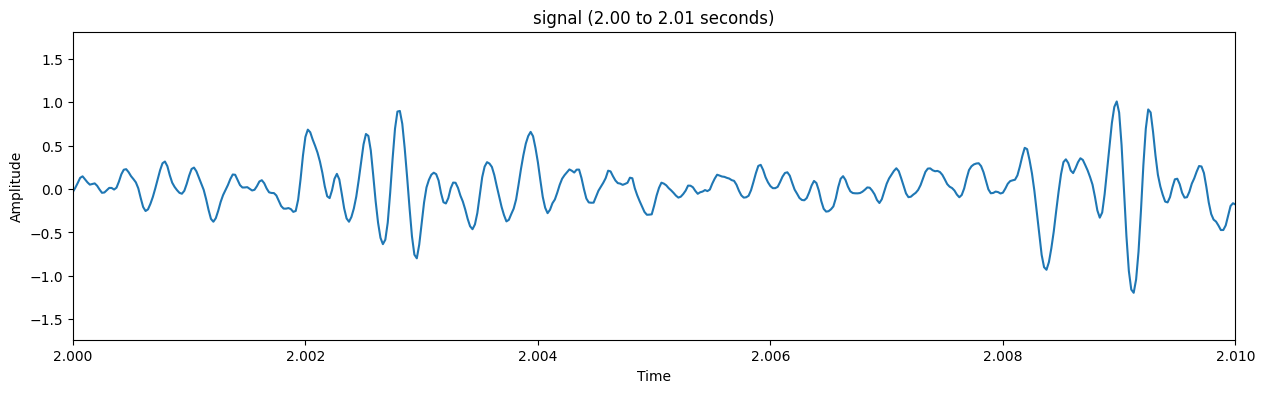

In [7]:
plt.figure(figsize=(15, 4))
plt.plot(time, signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('signal (2.00 to 2.01 seconds)')

plt.xlim(2.0, 2.01)

plt.show()

#PART G

#1)

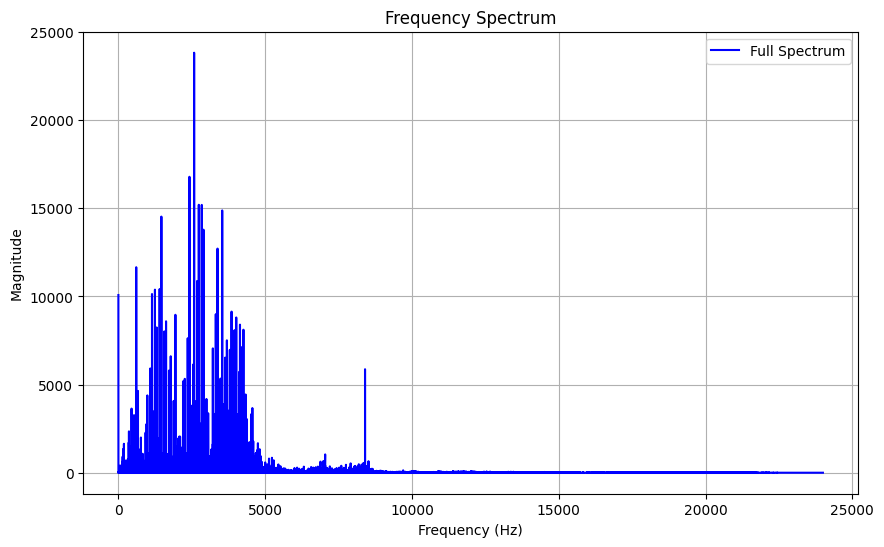

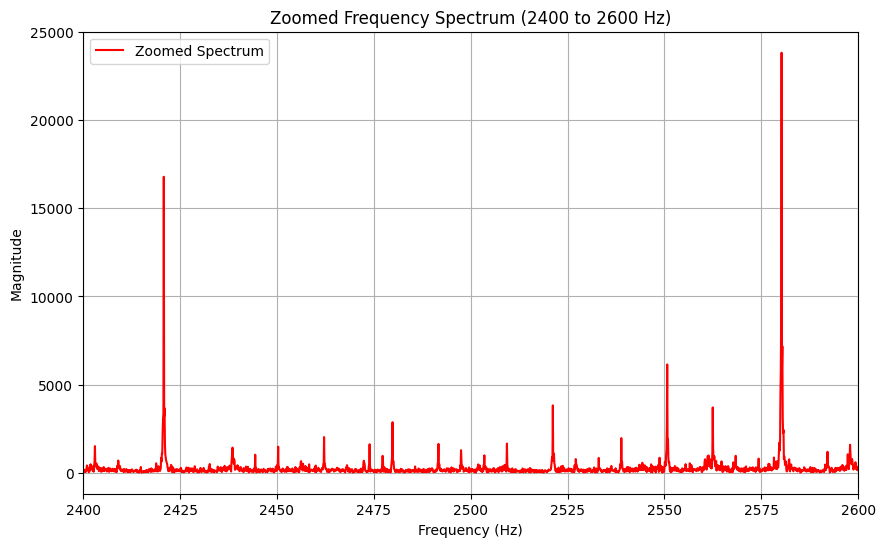

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

def plot_frequency_spectrum(signal, sampling_rate):
    """
    This function takes a time-domain signal and its sampling rate,
    computes the frequency spectrum using FFT, and plots it.
    It also zooms into a specific frequency range (e.g., 2000 to 3000 Hz).
    """
    # Step 1: Compute the FFT of the signal
    fft_result = np.fft.fft(signal)

    # Step 2: Compute the corresponding frequencies
    n = len(signal)  # Number of samples
    frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

    # Step 3: Compute the magnitude of the FFT result
    magnitude = np.abs(fft_result)

    # Step 4: Only consider the positive frequencies (first half of the spectrum)
    positive_frequencies = frequencies[:n//2]
    positive_magnitude = magnitude[:n//2]

    # Step 5: Plot the full frequency spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(positive_frequencies, positive_magnitude, color='blue', label="Full Spectrum")
    plt.title("Frequency Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid()
    plt.legend()
    plt.show()  # Show the first plot

    # Step 6: Zoom into the frequency range of interest (2400 to 2600 Hz)
    plt.figure(figsize=(10, 6))
    plt.plot(positive_frequencies, positive_magnitude, color='red', label="Zoomed Spectrum")
    plt.title("Zoomed Frequency Spectrum (2400 to 2600 Hz)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.xlim(2400, 2600)  # Limit the x-axis to the range 2400-2600 Hz
    plt.grid()
    plt.legend()
    plt.show()  # Show the second plot

# Load the data from the .mat file
data = loadmat('/content/drive/My Drive/data/110.mat')

# Extract the signal
signal = data['X110_DE_time'].flatten()  # Flatten to convert to 1D array if needed

# Define the sampling rate
sampling_rate = 48000  # Sampling rate is 48 kHz

# Call the function to plot the frequency spectrum
plot_frequency_spectrum(signal, sampling_rate)

In [ ]:
# در این نمودار، فرکانس‌هایی که بالاترین دامنه را دارند، پیک‌های اصلی را ایجاد می‌کنند.
از این نمودار، واضح است که فرکانس غالب تقریباً در محدوده بین 2000 تا 5000 هرتز قرار دارد، با یک پیک مشخص که در حدود 4000 هرتز دیده می‌شود.
این می‌تواند به شما کمک کند که بفهمید که چه فرکانس‌هایی بیشتر در سیگنال برجسته هستند.



Bookmark message
Copy message




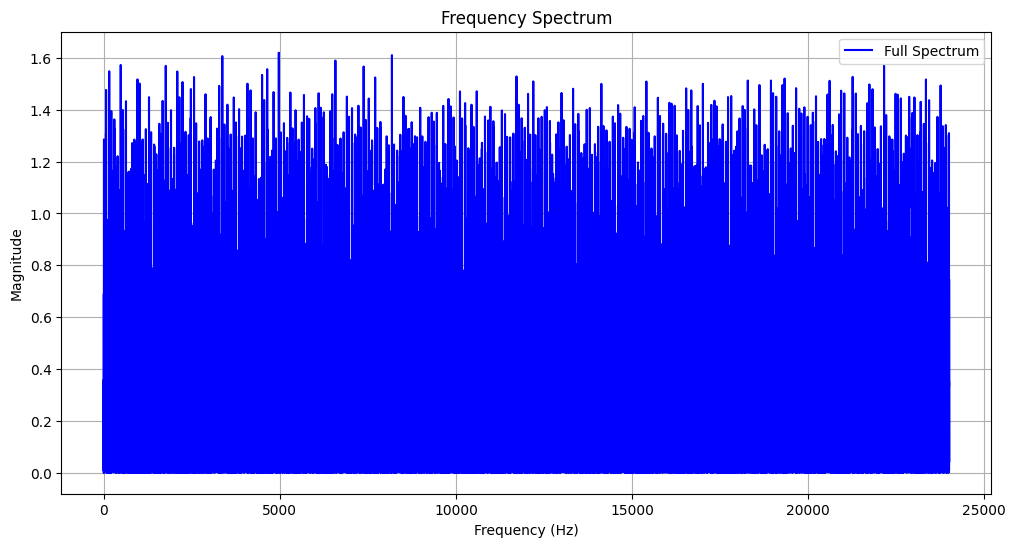

Dominant Frequency: 4972.226792589423 Hz


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# بارگذاری داده‌های صوتی
# فرض کنید داده‌های شما در یک آرایه numpy به نام 'data' و فرکانس نمونه‌برداری 'fs' است

# محاسبه فوریه:
spectrum = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(spectrum), 1/fs)
magnitude = np.abs(spectrum)

# پیدا کردن فرکانس غالب
peak_index = np.argmax(magnitude[:len(magnitude)//2])  # فقط نیمی از طیف را در نظر می‌گیریم
dominant_frequency = frequencies[peak_index]

# رسم طیف فرکانسی
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(frequencies)//2], magnitude[:len(magnitude)//2], color='blue', label='Full Spectrum')
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.legend()
plt.show()

# نمایش فرکانس غالب
print(f'Dominant Frequency: {dominant_frequency} Hz')

#PART D